In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import numpy as np

from environments.classics.tictactoe import TicTacToe, TicTacToeInteractive
from agents.pgp.pgp_softmax import SoftMaxPGP
from agents.repository import *
from plots.agent_plotter import AgentPlotter
from utils.policy_functions import *

In [3]:
# agent parameters
agent_X_name = "pgp_X"
agent_O_name = "pgp_O"

# Training parameters
n_steps = 1000
alpha = 0.1

In [4]:
# Create games against newbie random walk agents
game_simple_X = TicTacToeInteractive(play_first=True)
game_simple_O = TicTacToeInteractive(play_first=False)

3 Winning states:

state 404


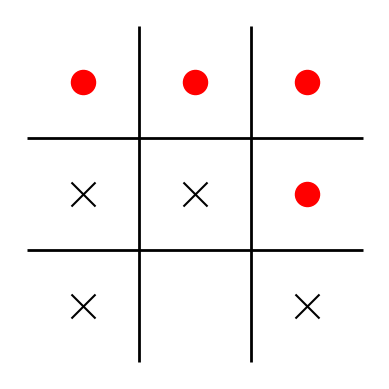

state 162


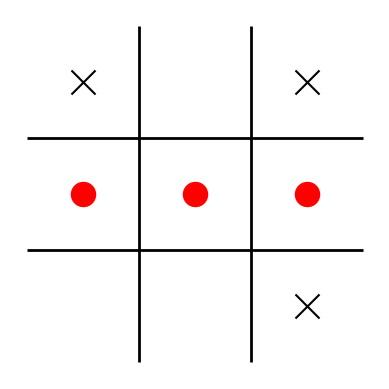

state 394


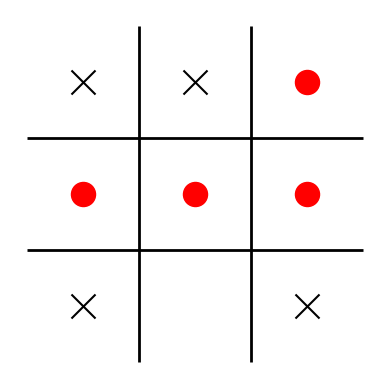

3 Losing states:
state 164


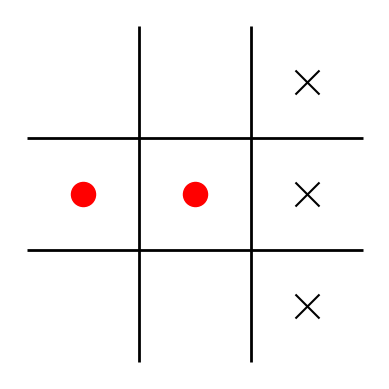

state 353


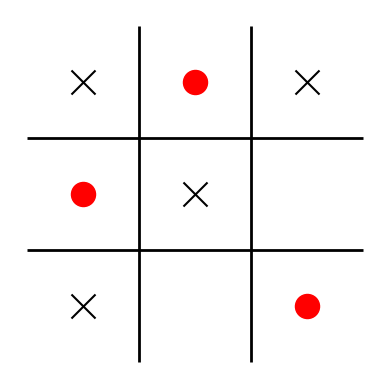

state 173


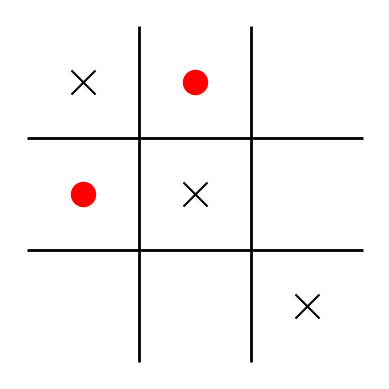

3 Draws states:
state 408


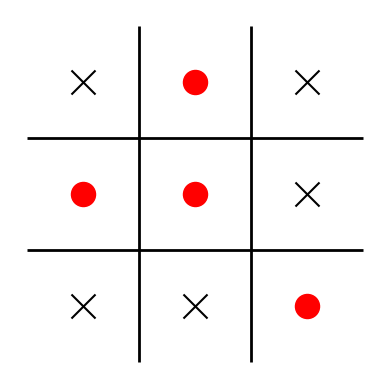

state 408


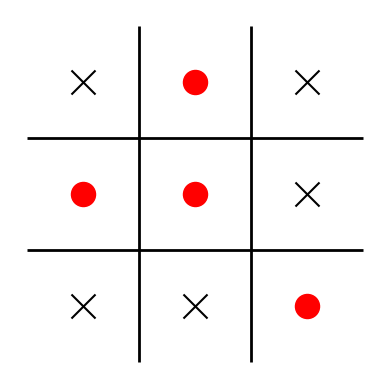

state 409


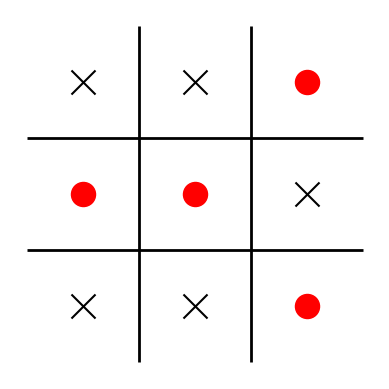

3 Winning actions:
state 55 - action 2 - index 8


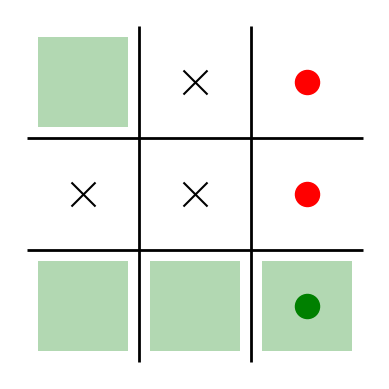

state 349 - action 4 - index 104


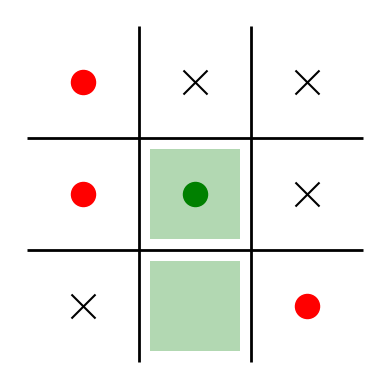

state 143 - action 7 - index 27


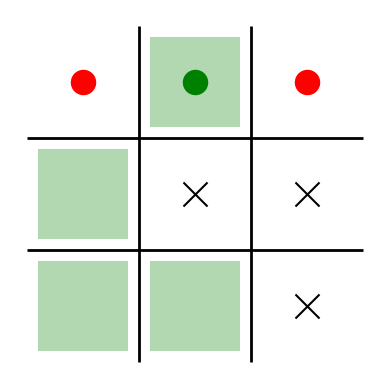

3 Losing actions:
state 391 - action 1 - index 539


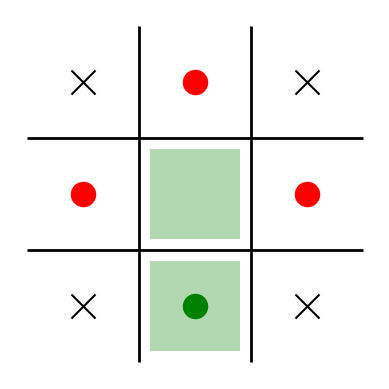

state 198 - action 0 - index 385


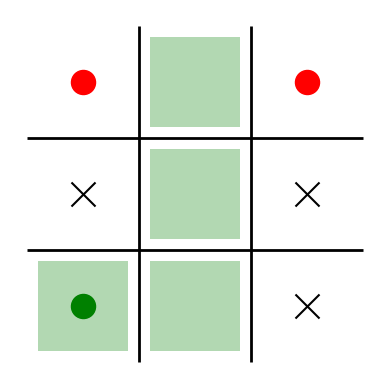

state 343 - action 5 - index 511


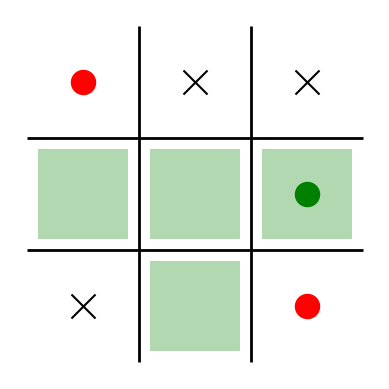

In [5]:
# Draw Worlds important states
n_examples = 3
game = game_simple_O

print("{} Winning states:".format(n_examples))
print("")
for s in np.random.choice(game.states_win, size=n_examples):
    print("state {}".format(s))
    game.draw(s)
    plt.show()

print("{} Losing states:".format(n_examples))
for s in np.random.choice(game.states_lose, size=n_examples):
    print("state {}".format(s))
    game.draw(s)
    plt.show()

print("{} Draws states:".format(n_examples))
for s in np.random.choice(game.states_draw, size=n_examples):
    print("state {}".format(s))
    game.draw(s)
    plt.show()

print("{} Winning actions:".format(n_examples))
for i in np.random.randint(0, game.events_to_win.shape[0], n_examples):
    s, a = game.events_to_win[i, :]
    print("state {} - action {} - index {}".format(s, a, i))
    game.draw(s, a)
    plt.show()

print("{} Losing actions:".format(n_examples))
for i in np.random.randint(0, game.events_to_lose.shape[0], n_examples):
    s, a = game.events_to_lose[i, :]
    print("state {} - action {} - index {}".format(s, a, i))
    game.draw(s, a)
    plt.show()


3 Checkmate actions:
state 44 - action 4 - index 0


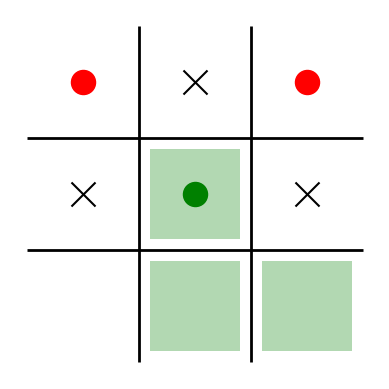

state 180 - action 6 - index 10


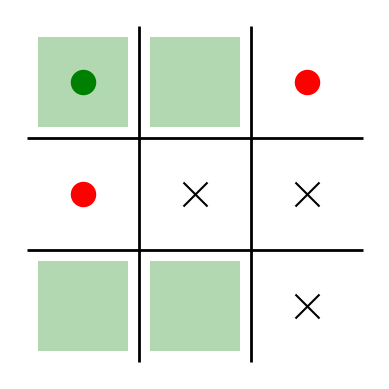

state 260 - action 8 - index 13


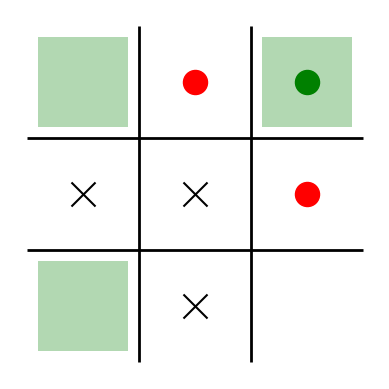

3 Opponent checkmate states:
state 94


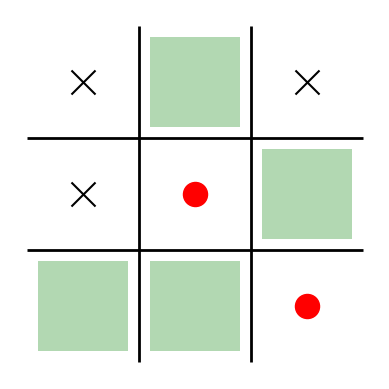

state 328


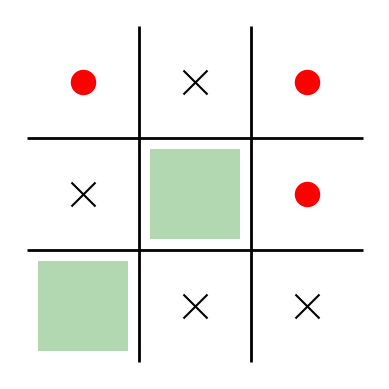

state 72


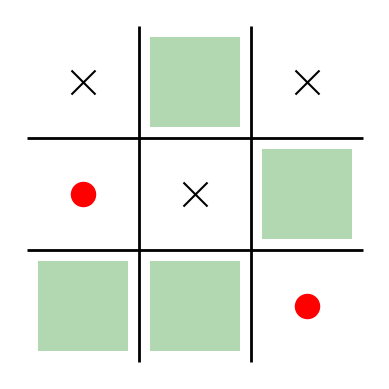

3 Into opponent checkemate actions:
state 186 - action 4 - index 40


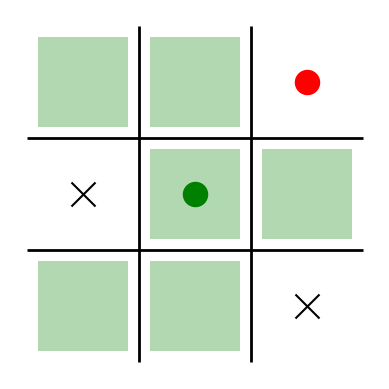

state 3 - action 0 - index 3


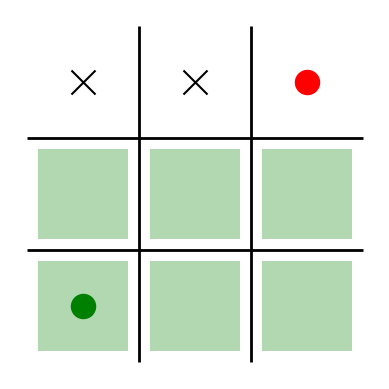

state 36 - action 1 - index 22


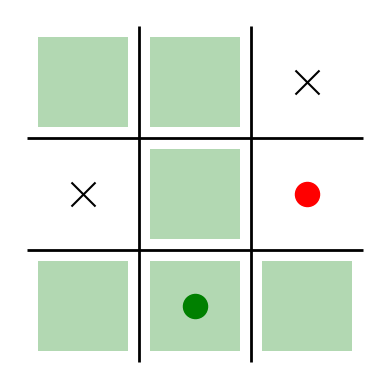

In [6]:
print("{} Checkmate actions:".format(n_examples))
for i in np.random.randint(0, game.events_fork_win.shape[0], n_examples):
    s, a = game.events_fork_win[i, :]
    print("state {} - action {} - index {}".format(s, a, i))
    game.draw(s, a)
    plt.show()
    
print("{} Opponent checkmate states:".format(n_examples))
for s in np.random.choice(game.states_fork_lose, size=n_examples):
    print("state {}".format(s))
    game.draw(s)
    plt.show()

print("{} Into opponent checkemate actions:".format(n_examples))
for i in np.random.randint(0, game.events_fork_lose.shape[0], n_examples):
    s, a = game.events_fork_lose[i, :]
    print("state {} - action {} - index {}".format(s, a, i))
    game.draw(s, a)
    plt.show()

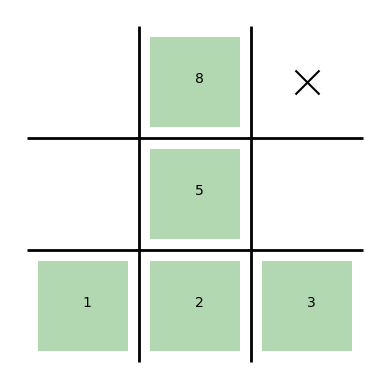

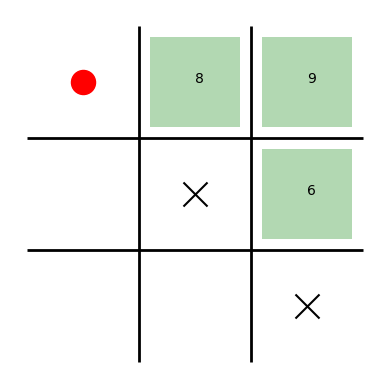

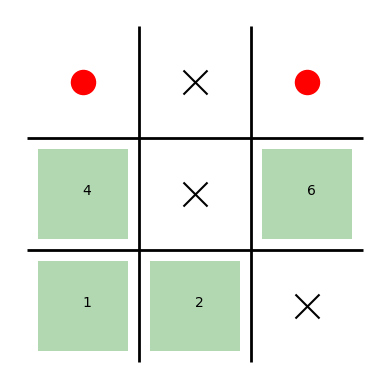

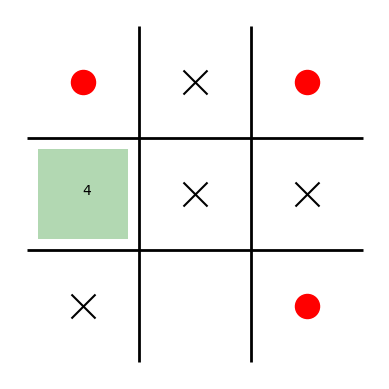

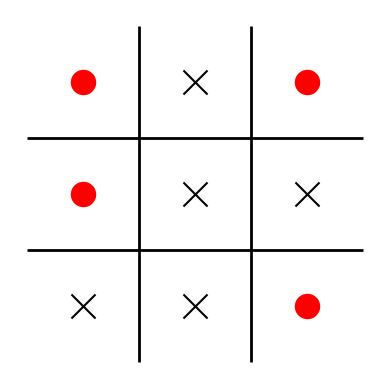

you lose


In [7]:
# Test worlds through interactive gameplay
game_simple_O.play_human(inline=True)

In [8]:
# Create agents
agent_X = load_model(agent_X_name, game_simple_X.name)
if agent_X is None:
    print("Agent X could not be found, training from scratch...")                     
    agent_X = SoftMaxPGP(game_simple_X, name=agent_X_name, p0_func=p0_uniform)
    agent_X.learn(n_steps=n_steps, alpha=alpha)
else:
    print("Agent X loaded")

agent_O = load_model(agent_O_name, game_simple_O.name)
if agent_O is None:
    print("Agent O could not be found, training from scratch...")                     
    agent_O = SoftMaxPGP(game_simple_O, name=agent_O_name, p0_func=p0_uniform)
    agent_O.learn(n_steps=n_steps, alpha=alpha)
else:
    print("Agent O loaded")

/home/fran-tr/Workspace/gpp_core/utils/policy_functions.py:43: RuntimeWarning: divide by zero encountered in log
  return np.log(agent.A / np.sum(agent.A, axis=1, keepdims=True))


Agent X could not be found, training from scratch...


100%|██████████| 1000/1000 [00:12<00:00, 79.63it/s]


Agent O could not be found, training from scratch...


100%|██████████| 1000/1000 [00:10<00:00, 99.09it/s]


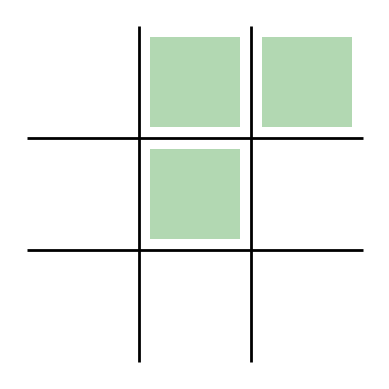

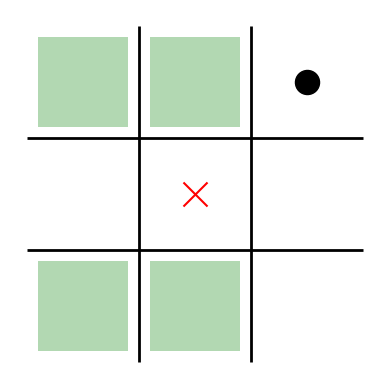

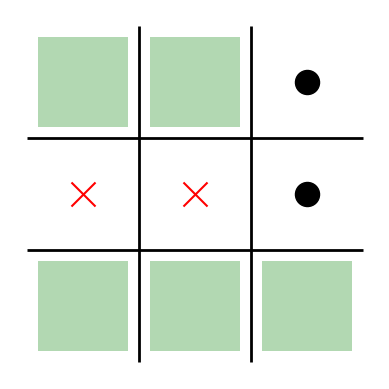

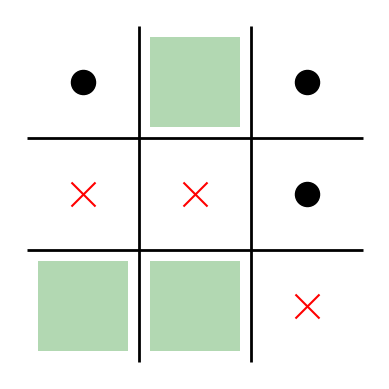

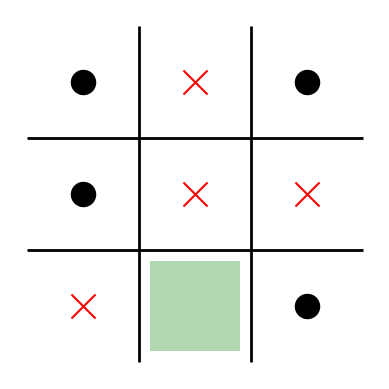

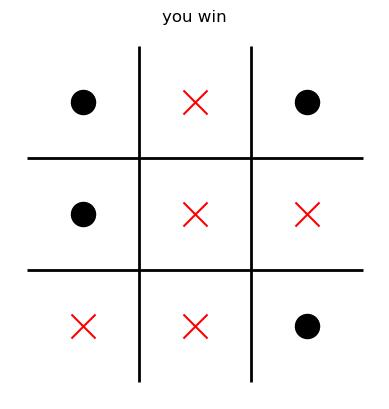

In [9]:
# Check agent's gameplay
game_simple_X.play_agent(agent_X, inline=True)


In [10]:
# Create games againts expert gpg agents
game_simple_X = TicTacToeInteractive(play_first=True, opponent_policy=agent_O.policy_vec())
game_simple_O = TicTacToeInteractive(play_first=False, opponent_policy=agent_X.policy_vec())

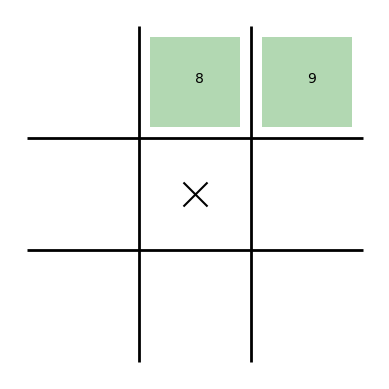

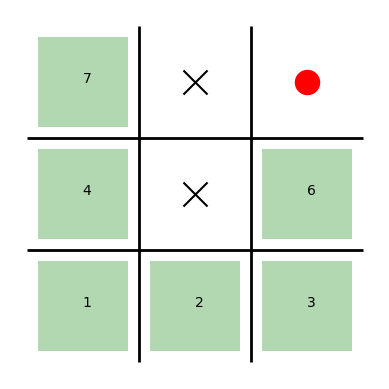

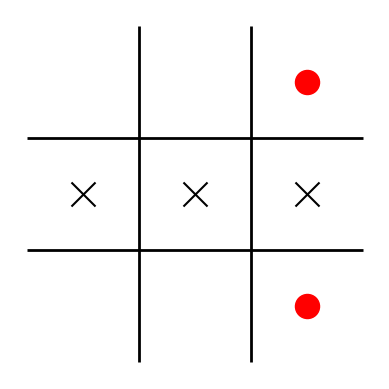

you lose


In [11]:
# Test worlds through interactive gameplay
game_simple_O.play_human(inline=True)